# Bay Area Housing Market in the COVID-19 Pandemic

The San Fransico Bay Area, popularly referred to as the Bay Area, is a region in Northern California spanning the city of San Francisco and surrounding counties. Since the Shelter in place order for six Bay Area counties annouced on March 16th 2020, COVID-19 pandemic has impacted every aspect of the economy and people's daily life. We are particularly interested in the impact it has on the Bay Area housing market.

### The Question - Did COVID-19 have any impact on the Bay Area housing market?

We will use the Bay Area housing market data from Redfin (https://www.redfin.com/blog/data-center/), and focus our analysis on five Bay Area counties: San Francisco, San Mateo, Santa Clara, Alameda, and Contra Costa.

![Image of Bay Area](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/California_Bay_Area_county_map_%28zoom%26color%29.svg/250px-California_Bay_Area_county_map_%28zoom%26color%29.svg.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data into a dataframe
df = pd.read_csv('weekly_housing_market_data_most_recent.tsv',sep='\t',parse_dates=['period_begin','period_end'])
df.head()

,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,average_sale_to_list_ratio,average_sale_to_list_ratio_yoy,median_days_on_market,median_days_on_market_yoy,pending_sales_to_sales_ratio_yoy,months_of_supply,months_of_supply_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,last_updated
0,2573,5,"Grainger County, TN",county,2017-02-13,2017-02-19,1 weeks,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-08 14:51:56
1,3038,5,"Colonial Heights, VA",county,2018-05-21,2018-05-27,1 weeks,7.0,0.166667,7.0,...,0.986653,-0.025574,19.0,-4.5,0.619048,7.428571,0.428571,10.0,1.500000,2020-07-08 14:51:56
2,582,5,"Jasper County, GA",county,2019-10-14,2019-10-20,1 weeks,5.0,0.250000,5.0,...,0.936307,-0.035206,37.0,-118.0,NaN,14.800000,-7.700000,4.0,-0.200000,2020-07-08 14:51:56
3,582,5,"Jasper County, GA",county,2017-07-31,2017-08-06,1 weeks,3.0,-0.250000,3.0,...,0.929293,0.043251,36.0,-22.0,NaN,29.000000,6.500000,2.0,-0.333333,2020-07-08 14:51:56
4,3038,5,"Colonial Heights, VA",county,2017-12-25,2017-12-31,1 weeks,3.0,NaN,3.0,...,1.012458,NaN,29.0,NaN,NaN,11.666667,NaN,3.0,0.000000,2020-07-08 14:51:56


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957808 entries, 0 to 957807
Data columns (total 77 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   region_id                                     957808 non-null  int64         
 1   region_type_id                                957808 non-null  int64         
 2   region_name                                   957808 non-null  object        
 3   region_type                                   957808 non-null  object        
 4   period_begin                                  957808 non-null  datetime64[ns]
 5   period_end                                    957808 non-null  datetime64[ns]
 6   duration                                      957808 non-null  object        
 7   total_homes_sold                              845039 non-null  float64       
 8   total_homes_sold_yoy                          813207 n

In [5]:
# examine the region type column
df['region_type'].value_counts()

county    707258
metro     250550
Name: region_type, dtype: int64

In [6]:
# examine the period begin column to see the date range
df['period_begin'].value_counts().sort_index()

2017-01-02    5252
2017-01-09    5263
2017-01-16    5282
2017-01-23    5285
2017-01-30    5300
              ... 
2020-06-01    3464
2020-06-08    3470
2020-06-15    1713
2020-06-22    1726
2020-06-29    1717
Name: period_begin, Length: 183, dtype: int64

In [7]:
# get 1-week duration data for the five California counties we want to investigate
ca = df[(df['region_name'].str.contains('CA',regex=False)) &
           (df['duration'].str.contains('1 weeks',regex=False)) &
           (df['region_type'].str.contains('county',regex=False))]

# remove CA from the region name column
ca['region_name'] = ca['region_name'].str.replace(r' County, CA$', '')
ca.head()

C:\Users\Billy\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,region_id,region_type_id,region_name,region_type,period_begin,period_end,duration,total_homes_sold,total_homes_sold_yoy,average_homes_sold,...,average_sale_to_list_ratio,average_sale_to_list_ratio_yoy,median_days_on_market,median_days_on_market_yoy,pending_sales_to_sales_ratio_yoy,months_of_supply,months_of_supply_yoy,average_pending_sales_listing_updates,average_pending_sales_listing_updates_yoy,last_updated
123,332,5,Orange,county,2018-08-13,2018-08-19,1 weeks,585.0,-0.197531,585.0,...,0.987862,-0.001267,48.0,2.0,0.156906,15.198291,3.788140,927.0,-0.099125,2020-07-08 14:51:56
128,322,5,Madera,county,2018-07-23,2018-07-29,1 weeks,30.0,-0.333333,30.0,...,1.003047,0.005014,26.5,-1.5,-0.222222,18.200000,7.933333,38.0,-0.173913,2020-07-08 14:51:56
129,322,5,Madera,county,2020-02-24,2020-03-01,1 weeks,39.0,0.344828,39.0,...,0.986351,-0.007445,53.0,-15.0,0.097259,11.102564,-5.518126,50.0,0.515152,2020-07-08 14:51:56
131,322,5,Madera,county,2019-10-28,2019-11-03,1 weeks,41.0,0.518519,41.0,...,0.989764,-0.000844,70.0,35.0,-0.091238,12.731707,-8.194219,32.0,0.333333,2020-07-08 14:51:56
233,341,5,San Joaquin,county,2019-04-29,2019-05-05,1 weeks,176.0,-0.053763,176.0,...,0.993629,-0.002170,18.5,5.5,-0.105450,7.704545,1.994868,208.0,-0.126050,2020-07-08 14:51:56


In [8]:
# create function to get data from the ca dataframe for specific time period and counties
def getdata(startdate, enddate, counties, cols):
    columns = ['region_name', 'period_begin', 'period_end']
    columns.extend(cols)
    df = ca[ca['region_name'].str.contains(counties,regex=True) &
            (ca['period_begin'] >= startdate) &
            (ca['period_begin'] <= enddate)]
    return df[columns].sort_values('period_begin')

### 2020 Bay Area Housing Market Trend

First we want to take a look at the housing market data since the begining of 2020, when the pandemic started.

In [9]:
# get Mar-Jun 2020 data for the five counties
df_2020 = getdata('2020-03-01','2020-06-30','San Francisco|San Mateo|Santa Clara|Alameda|Contra Costa',
                  ['total_homes_sold','total_homes_sold_yoy','median_sale_price','median_sale_price_yoy','inventory'])
df_2020.head()

,region_name,period_begin,period_end,total_homes_sold,total_homes_sold_yoy,median_sale_price,median_sale_price_yoy,inventory
381892,San Mateo,2020-03-02,2020-03-08,95.0,-0.040404,1455000.0,0.039286,608.0
271131,San Francisco,2020-03-02,2020-03-08,103.0,0.072917,1460000.0,0.010031,902.0
236092,Contra Costa,2020-03-02,2020-03-08,220.0,0.208791,635750.0,0.135268,1298.0
33024,Alameda,2020-03-02,2020-03-08,217.0,0.048309,831000.0,0.007273,1166.0
141060,Santa Clara,2020-03-02,2020-03-08,218.0,-0.110204,1190000.0,0.034783,1394.0


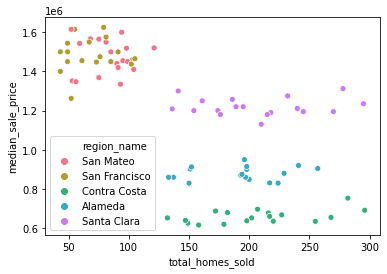

In [10]:
sns.scatterplot(x='total_homes_sold',y='median_sale_price',hue='region_name',data=df_2020,palette='husl')

From the scatterplot we can see that San Francisco and San Mateo have higher median sale price and lower total homes sold during the pandemic comparing to the other three counties, which is consistent with the historical trend.

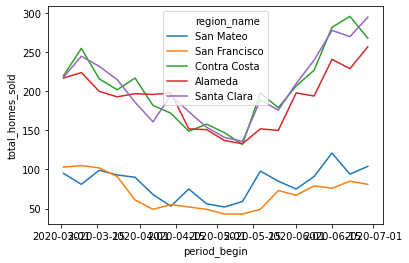

In [11]:
sns.lineplot(x='period_begin',y='total_homes_sold',data=df_2020,hue='region_name')

From the lineplot above, we can clearly see that the number of homes sold dropped drastically from mid-March to mid May, right when the shelter-in-place order started. During this period, activitis required for buying/selling homes, such us open house, inspection, and appraisal, were put on hold. The number of homes sold raised back to a level even higher than mid-March quickly since mid-May, when the related activities resumed under new rules and regulations.

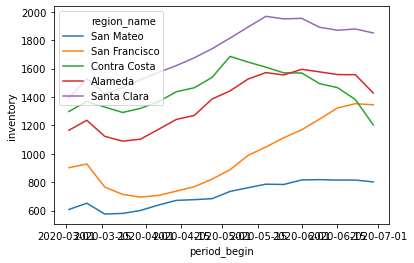

In [12]:
sns.lineplot(x='period_begin',y='inventory',data=df_2020,hue='region_name')

The lineplot for the inventory indicates that the inventory dropped a little when the shelter-in-place order started, but have been slowy increasing. Some sellers take their houses off of the market due to concern for the pandemic, but majority of the sellers just decided to wait and see.

Now we want to visulize the median price for these counties in 2020 and compare the trend with 2019 to extract more insight.

In [13]:
# get Mar-Jun 2019 data for the five counties
df_2019 = getdata('2019-03-01','2019-06-30','San Francisco|San Mateo|Santa Clara|Alameda|Contra Costa',
             ['total_homes_sold','total_homes_sold_yoy','median_sale_price','median_sale_price_yoy','inventory'])

(array([737119., 737133., 737150., 737164., 737180., 737194., 737211.,
        737225.]),
 <a list of 8 Text major ticklabel objects>)

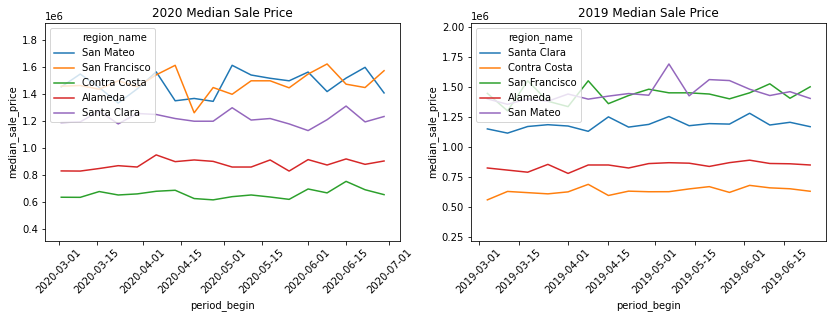

In [14]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
sns.lineplot(x='period_begin',y='median_sale_price',data=df_2020,hue='region_name')
plt.title('2020 Median Sale Price')
plt.margins(y=0.3)
plt.legend(loc='upper left')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.lineplot(x='period_begin',y='median_sale_price',data=df_2019,hue='region_name')
plt.title('2019 Median Sale Price')
plt.margins(y=0.3)
plt.legend(loc='upper left')
plt.xticks(rotation=45)

For the two line plots above, we can see that the median sale price for San Francisco dropped from \\$1.6M to \\$1.3M in the span of a couple of weeks during the pandemic. When looking at the 2019 data, the median sale price for San Francisco was fairly stable during the same month.

The reason behind this price drop could be related the pandemic. People live in the city to be close to their jobs, restaurants and entertainments, and the close-down has changed that. They no longer need to go to the office everyday, non-essential retails and bars are clsoed, and restaurants are doing delivery and take-out only. The benefits of living in the city are taken over by the drawbacks of having smaller living spaces, the demind dropped, and so did the price.

### 2017-2019 Historical Housing Market Comparison

Now we want to compare the 2020 data with the historical data from 2017-2019, to see if the trends we observed from 2020 are just norms or indeed related to the COVID-19 pandemic.

In [15]:
# get data for Mar-Jun 2017 and add a year column
df_2017 = getdata('2017-03-01','2017-06-30','San Francisco|San Mateo|Santa Clara|Alameda|Contra Costa',
             ['total_homes_sold','total_homes_sold_yoy','median_sale_price','median_sale_price_yoy','inventory'])
df_2017['year'] = df_2017['period_begin'].dt.year
df_2017.head()

,region_name,period_begin,period_end,total_homes_sold,total_homes_sold_yoy,median_sale_price,median_sale_price_yoy,inventory,year
91389,Santa Clara,2017-03-06,2017-03-12,259.0,0.151111,926000.0,0.027747,1323.0,2017
45850,San Mateo,2017-03-06,2017-03-12,104.0,0.142857,1171250.0,0.093604,532.0,2017
105458,San Francisco,2017-03-06,2017-03-12,99.0,0.125000,1250000.0,0.094571,776.0,2017
236208,Contra Costa,2017-03-06,2017-03-12,224.0,-0.013216,582500.0,0.158605,1259.0,2017
138339,Alameda,2017-03-06,2017-03-12,236.0,0.118483,730000.0,0.123077,1157.0,2017


In [16]:
# get data for Mar-Jun 2018 and add a year column
df_2018 = getdata('2018-03-01','2018-06-30','San Francisco|San Mateo|Santa Clara|Alameda|Contra Costa',
             ['total_homes_sold','total_homes_sold_yoy','median_sale_price','median_sale_price_yoy','inventory'])
df_2018['year'] = df_2018['period_begin'].dt.year

# add a year column for 2019 data
df_2019['year'] = df_2019['period_begin'].dt.year

# add a year column for 2020 data
df_2020['year'] = df_2020['period_begin'].dt.year

In [17]:
# combine the data for 2017-2019
years = [df_2017, df_2018, df_2019]
df_17_19 = pd.concat(years,ignore_index=True)

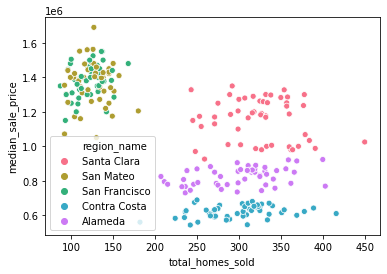

In [19]:
sns.scatterplot('total_homes_sold','median_sale_price',hue='region_name',data=df_17_19,palette='husl')

The scatterplot for 2017-2019 total homes sold and median sale price shows similar patterns as the 2020 data. However, by taking a closer look, we can see that the gap in median sale price between San Francisco/San Mateo and other counties is smaller in the previous years than 2020.

In [20]:
# combine the data for 2017-2020
years = [df_2017, df_2018, df_2019, df_2020]
df_17_20 = pd.concat(years,ignore_index=True)
df_17_20.head()

,region_name,period_begin,period_end,total_homes_sold,total_homes_sold_yoy,median_sale_price,median_sale_price_yoy,inventory,year
0,Santa Clara,2017-03-06,2017-03-12,259.0,0.151111,926000.0,0.027747,1323.0,2017
1,San Mateo,2017-03-06,2017-03-12,104.0,0.142857,1171250.0,0.093604,532.0,2017
2,San Francisco,2017-03-06,2017-03-12,99.0,0.125000,1250000.0,0.094571,776.0,2017
3,Contra Costa,2017-03-06,2017-03-12,224.0,-0.013216,582500.0,0.158605,1259.0,2017
4,Alameda,2017-03-06,2017-03-12,236.0,0.118483,730000.0,0.123077,1157.0,2017


In [21]:
df_17_20_mean = df_17_20.groupby(['region_name','year']).mean().reset_index()
df_17_20_mean.head()

,region_name,year,total_homes_sold,total_homes_sold_yoy,median_sale_price,median_sale_price_yoy,inventory
0,Alameda,2017,299.352941,0.010674,769962.058824,0.097741,1348.470588
1,Alameda,2018,304.176471,0.018083,863189.823529,0.121164,1253.764706
2,Alameda,2019,297.352941,-0.017892,844014.705882,-0.020652,1801.882353
3,Alameda,2020,189.944444,-0.322175,881211.111111,0.042876,1366.555556
4,Contra Costa,2017,301.470588,0.029380,591138.382353,0.087254,1544.882353


Text(0.5, 1.0, 'Median Sale Price')

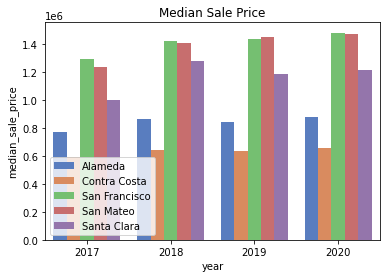

In [22]:
sns.barplot('year','median_sale_price',hue='region_name',data=df_17_20_mean,ci=None,palette='muted')
plt.legend(loc='lower left')
plt.title('Median Sale Price')

Text(0.5, 1.0, 'Median Sale Price YoY')

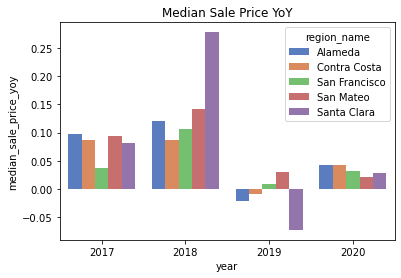

In [23]:
sns.barplot('year','median_sale_price_yoy',hue='region_name',data=df_17_20_mean,ci=None,palette='muted')
plt.title('Median Sale Price YoY')

From above bar plots, we can see that the median sale price for all counties slighly increased during the pandemic. We can see the YoY rate even recovered from the negative number in 2019, although it was still a lot lower than that of 2017 and 2018.

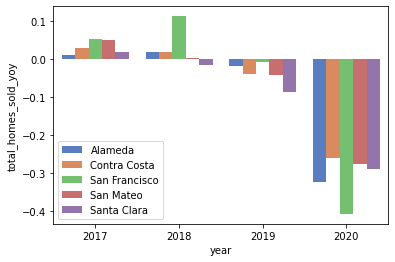

In [24]:
sns.barplot('year','total_homes_sold_yoy',hue='region_name',data=df_17_20_mean,ci=None,palette='muted')
plt.legend(loc='lower left')

The YoY on total numbers of home sold dropped for all counties comparing to previous years, which was expected due to the close-down. Alameda and San Francisco suffered from the deepest drops.

In [25]:
sf = df_17_20[df_17_20['region_name'] == 'San Francisco'].set_index('period_begin').resample('Y').total_homes_sold.sum()
sm = df_17_20[df_17_20['region_name'] == 'San Mateo'].set_index('period_begin').resample('Y').total_homes_sold.sum()
sc = df_17_20[df_17_20['region_name'] == 'Santa Clara'].set_index('period_begin').resample('Y').total_homes_sold.sum()
al = df_17_20[df_17_20['region_name'] == 'Alameda'].set_index('period_begin').resample('Y').total_homes_sold.sum()
cc = df_17_20[df_17_20['region_name'] == 'Contra Costa'].set_index('period_begin').resample('Y').total_homes_sold.sum()

In [26]:
total_sold = sum([sf,sm,sc,al,cc])

sf_percent = (sf/total_sold).dropna()
sm_percent = (sm/total_sold).dropna()
sc_percent = (sc/total_sold).dropna()
al_percent = (al/total_sold).dropna()
cc_percent = (cc/total_sold).dropna()

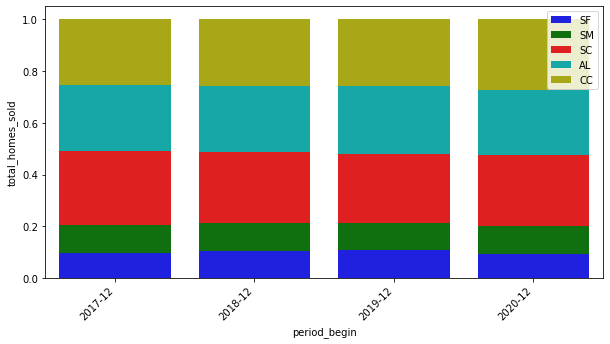

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(sf_percent.index,sf_percent,color='b',label='SF')
sns.barplot(sm_percent.index,sm_percent,color='g',bottom=sf_percent,label='SM')
sns.barplot(sc_percent.index,sc_percent,color='r',bottom=sf_percent+sm_percent,label='SC')
sns.barplot(al_percent.index,al_percent,color='c',bottom=sf_percent+sm_percent+sc_percent,label='AL')
sns.barplot(cc_percent.index,cc_percent,color='y',bottom=sf_percent+sm_percent+sc_percent+al_percent,label='CC')
plt.legend()
plt.xticks(range(len(sf_percent)),sf_percent.index.strftime('%Y-%m'),rotation=45,ha='right')
plt.show()

Looking at the stacked bar plot above, we can see that the percentage taken by San Francisco and San Mateo in total number of homes sold slighly dropped, eventhough the change is very minor.

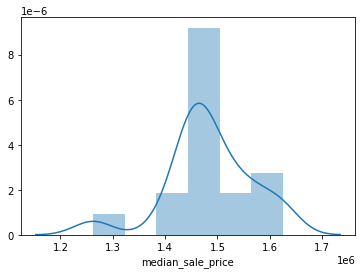

In [28]:
sns.distplot(df_2020[df_2020['region_name'] == 'San Francisco']['median_sale_price'])

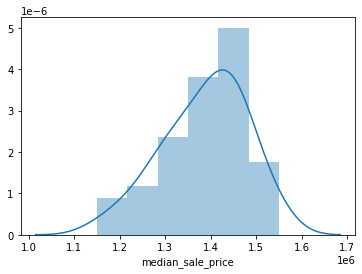

In [29]:
sns.distplot(df_17_19[df_17_19['region_name'] == 'San Francisco']['median_sale_price'])

### Next Steps - Hypothesis Testing

For the next steps, to further understand the impact the pandemic has on the median sale price, we can test below hypothesis:  
  
**H0: The mean of the median sale price for San Francisco during the COVID-19 pandemic is the same as 2017-2019  
H1: The mean of the median sale price for San Francisco during the COVID-19 pandemic was not the same as 2017-2019**